### Book dataset

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder   

In [2]:
#reading the data
books=pd.read_csv("book.csv")
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
#build APRIORI model
freq_books=apriori(books,min_support=0.1,use_colnames=True)
freq_books

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [4]:
rule_books=association_rules(freq_books,metric="lift",min_threshold=0.6)
rule_books

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [5]:
rule_books.sort_values("lift",ascending=False)[1:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
99,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
94,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [6]:
rule_books[rule_books.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


### Visualization of data

Text(0, 0.5, 'lift')

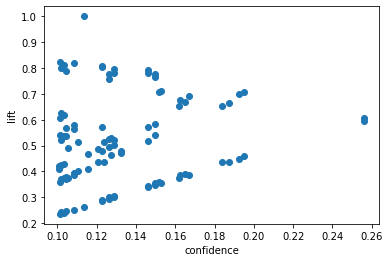

In [7]:
#support vs confidence
plt.scatter(x='support',y='confidence',data=rule_books)
plt.xlabel('confidence')
plt.ylabel('lift')

Text(0, 0.5, 'lift')

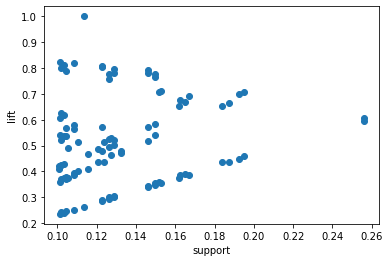

In [8]:
#support vs lift
plt.scatter(x='support',y='confidence',data=rule_books)
plt.xlabel('support')
plt.ylabel('lift')

<AxesSubplot:xlabel='support'>

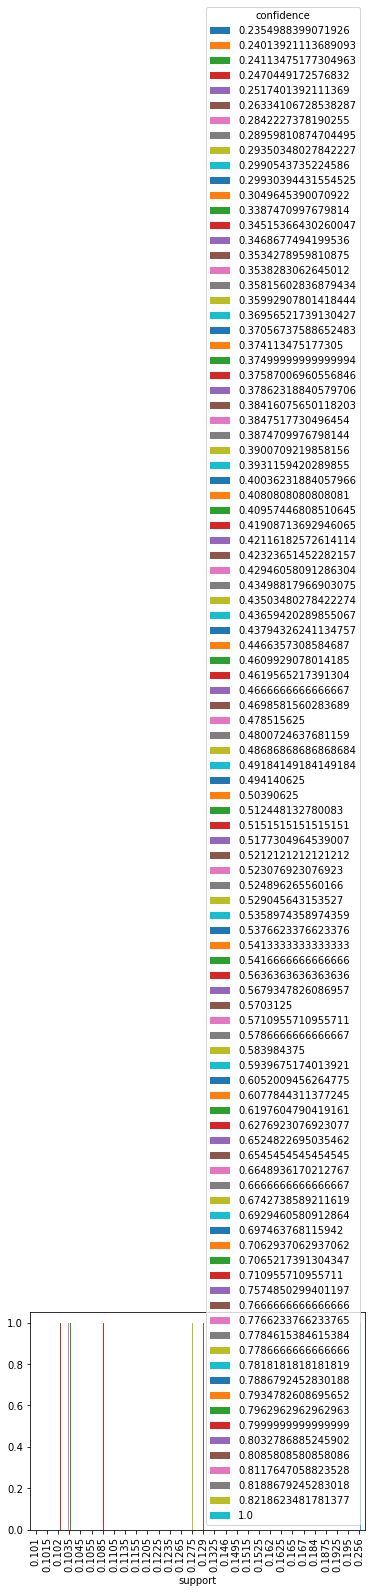

In [9]:
pd.crosstab(rule_books.support,rule_books.confidence).plot(kind="bar")

<AxesSubplot:ylabel='support'>

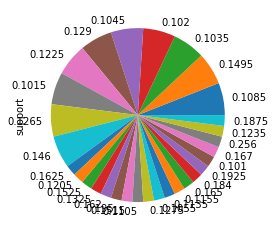

In [10]:
rule_books["support"].value_counts()
rule_books.support.value_counts().plot(kind="pie")

<AxesSubplot:ylabel='support'>

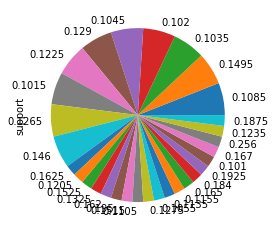

In [11]:
rule_books["support"].value_counts()
rule_books.support.value_counts().plot(kind="pie")

C:\Users\pabba\anaconda3\lib\site-packages\seaborn\distributions.py:1181: UserWarning: The following kwargs were not used by contour: 'X', 'Y'
  cset = contour_func(


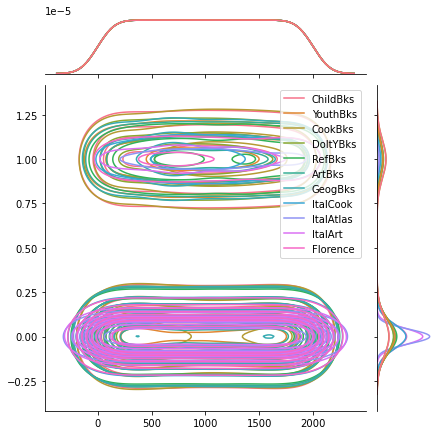

In [12]:

sns.jointplot(X='support',Y='confidence',data=books,kind='kde')
plt.show()

<AxesSubplot:xlabel='support'>

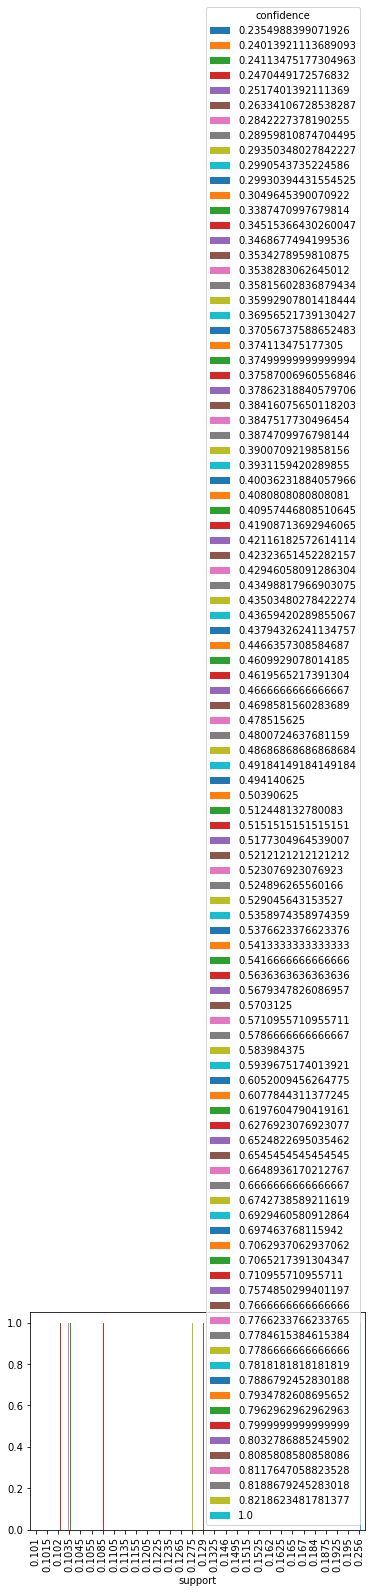

In [15]:
pd.crosstab(rule_books.support,rule_books.confidence).plot(kind="bar")

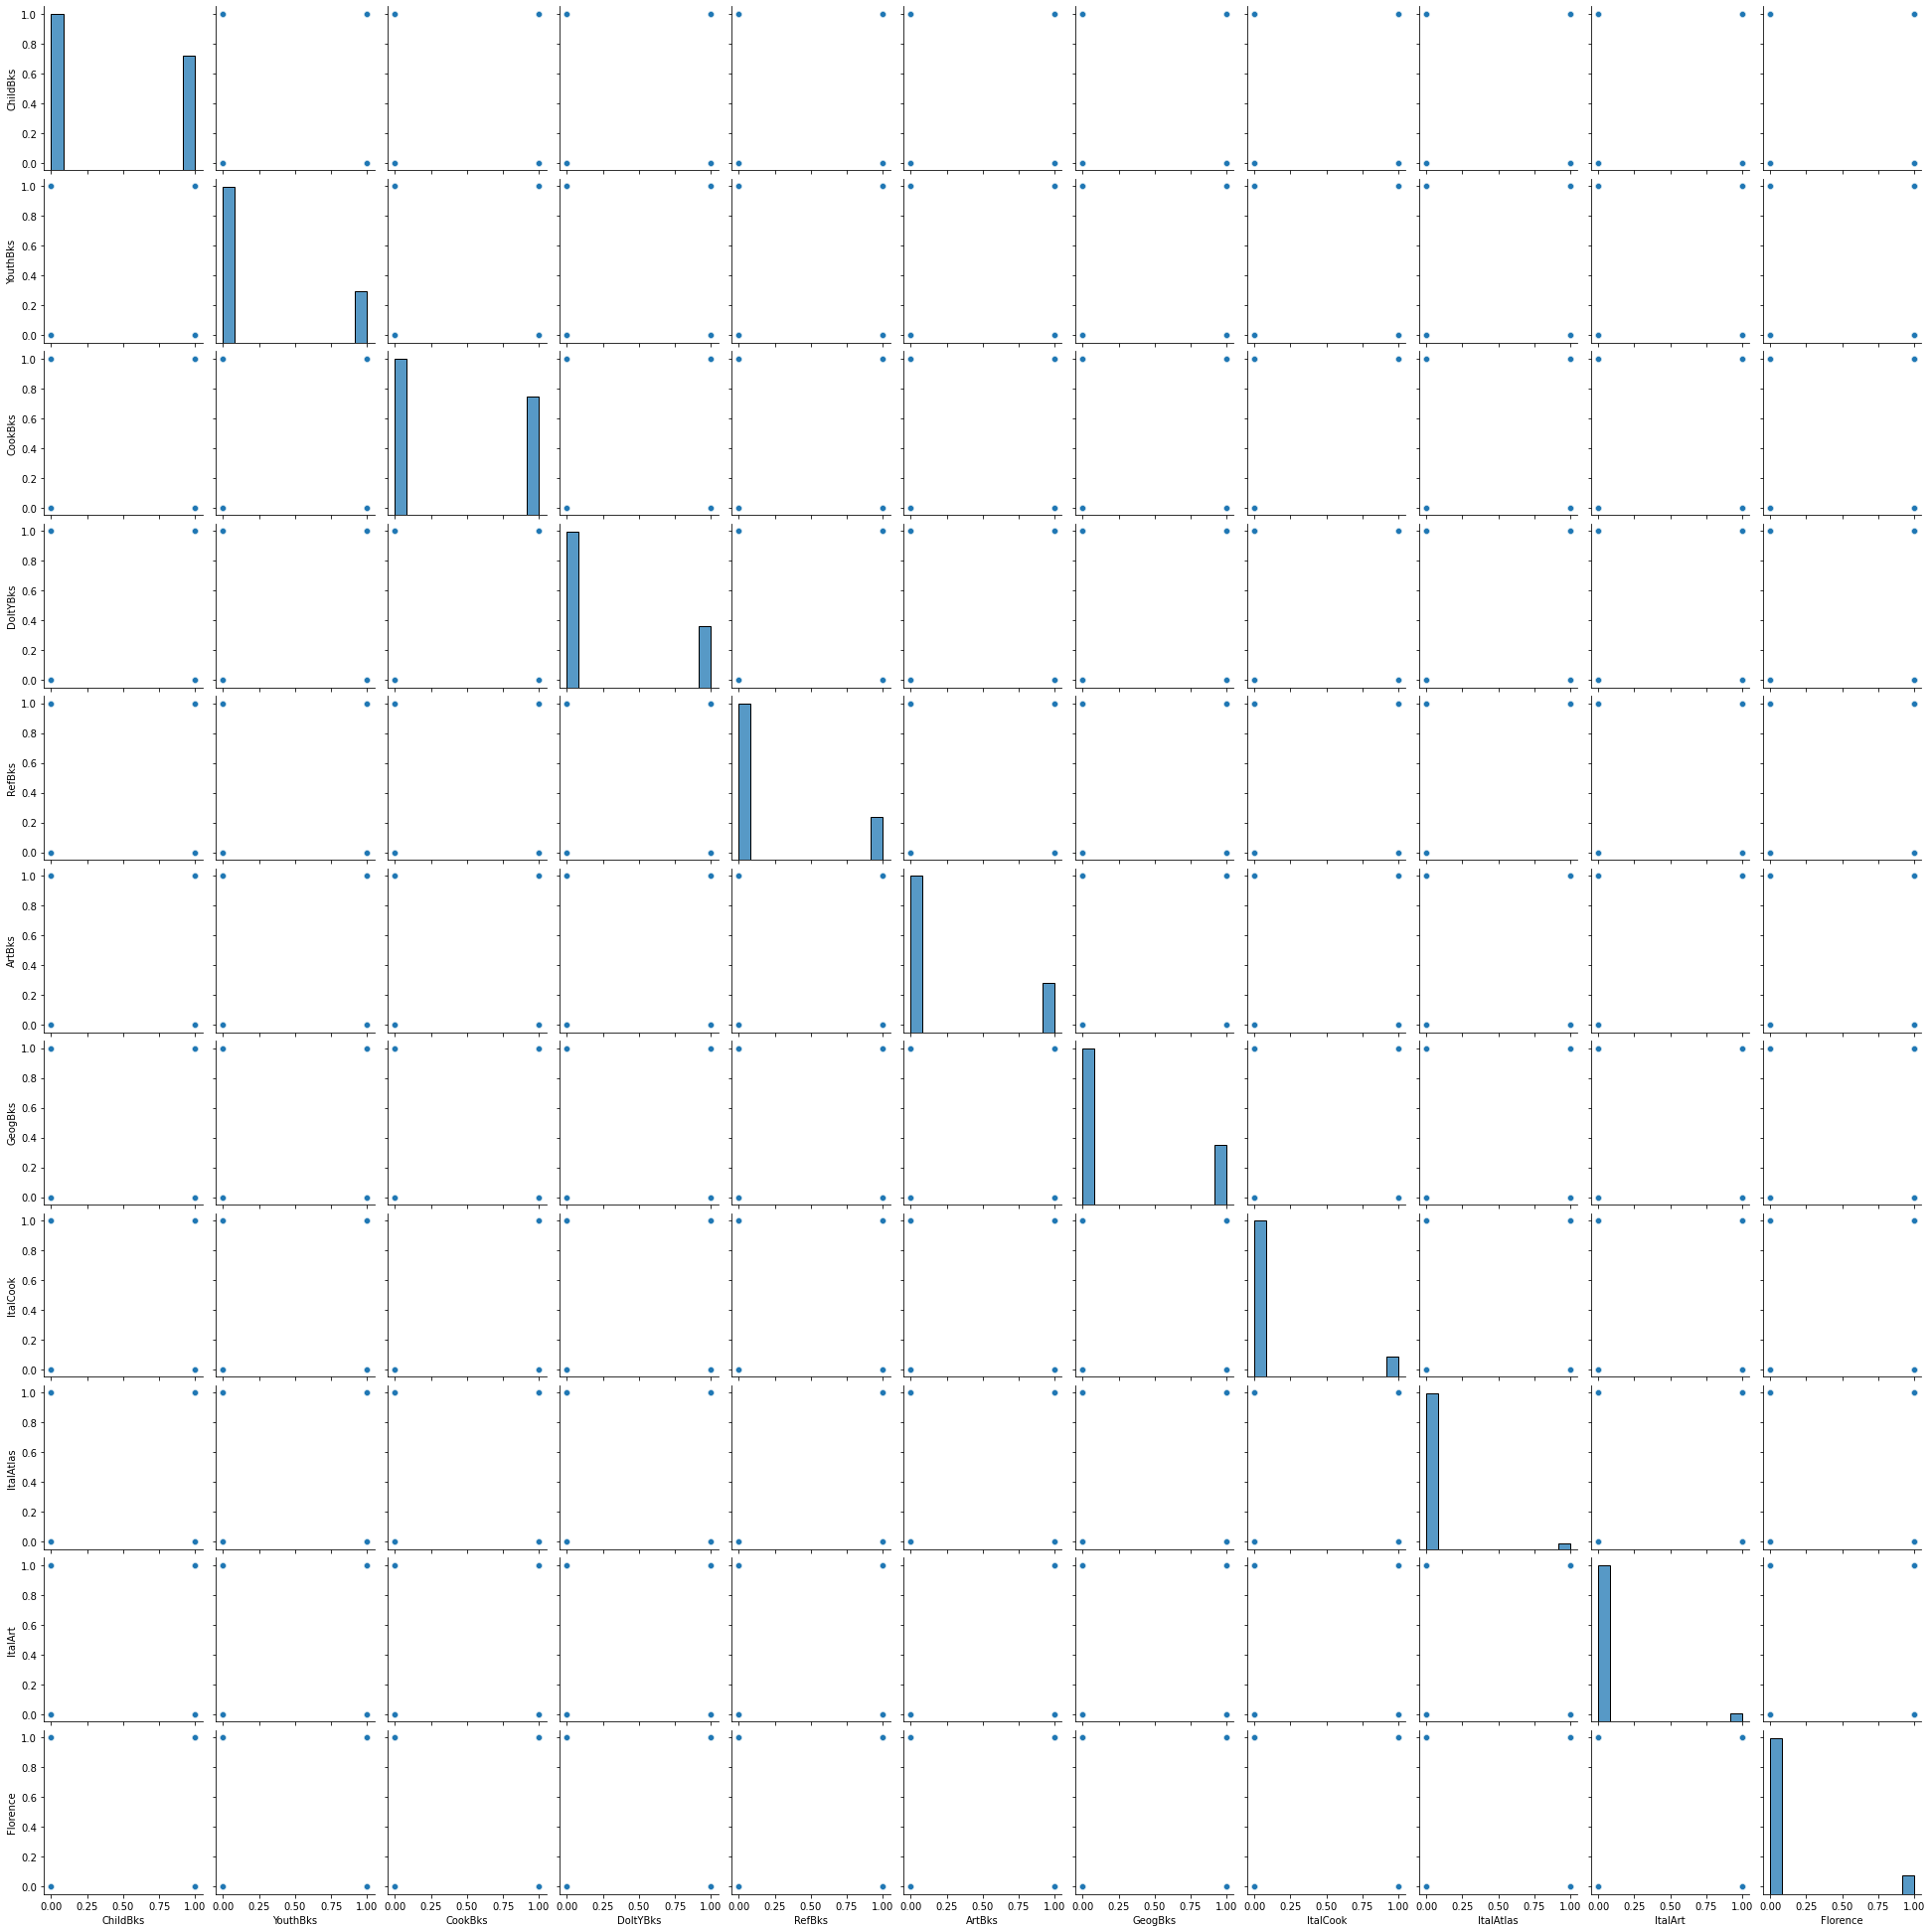

In [16]:
sns.pairplot(books)
plt.show()

C:\Users\pabba\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lift', ylabel='Density'>

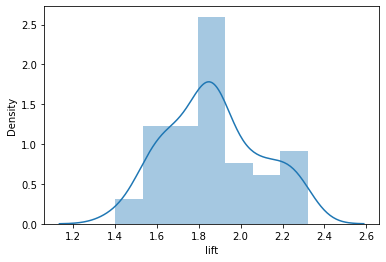

In [17]:
sns.distplot(rule_books['lift'])

### Book dataset Apriori Algorithm is done min_support =0.1 is given and then association rules 'lift' type is done where min_threshold is 0.6 as taken and output is obtained for that. Than lift>1 values is been filtered form the output.

# Movie data


In [18]:
#importing required libraries
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder


In [19]:
#reading the data
movies=pd.read_csv("my_movies.csv")
movies=movies.replace(np.nan,'',regex=True)
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,,,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,,,,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,,,,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,,,,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,,1,1,0,0,0,0,0,1,0,1


In [20]:
#to know the shape
movies.shape

(10, 15)

In [21]:
#to know the null values
movies.isna().sum()

V1               0
V2               0
V3               0
V4               0
V5               0
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [22]:
#to know unique values of V1
movies.V1.unique()

array(['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1'], dtype=object)

In [23]:
#to know unique values of V2
movies.V2.unique()

array(['LOTR1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR'], dtype=object)

In [24]:
#dropping the v1 column 
movies1=movies.drop('V1',axis=1)
movies1

,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Patriot,Braveheart,,,0,1,0,0,1,0,0,0,1,0
2,LOTR2,,,,0,0,1,0,0,1,0,0,0,0
3,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
4,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
5,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
6,Harry Potter2,,,,0,0,0,1,0,0,1,0,0,0
7,Patriot,,,,0,1,0,0,1,0,0,0,0,0
8,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
9,LOTR,Gladiator,Green Mile,,1,1,0,0,0,0,0,1,0,1


In [25]:
#droping V2 column
movies1=movies1.drop('V2',axis=1)

In [26]:
#dropping V3 and V4 column
movies1=movies1.drop('V3',axis=1)
movies1=movies1.drop('V4',axis=1)

In [27]:
#dropping V5 column
movies1=movies1.drop('V5',axis=1)
movies1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [28]:
#knowing the shape of new variable
movies1.shape

(10, 10)

In [29]:
#knowing the columns of new columns
movies1.columns

Index(['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1', 'Patriot',
       'LOTR2', 'Harry Potter2', 'LOTR', 'Braveheart', 'Green Mile'],
      dtype='object')

In [30]:
#using APRIORI agorithm
freq_set1=apriori(movies1,min_support=0.4,use_colnames=True)
freq_set1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Sixth Sense, Gladiator, Patriot)"


In [31]:
rules_1=association_rules(freq_set1,metric='lift',min_threshold=0.7)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
7,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
8,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
9,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [32]:
rules_1.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
10,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
6,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
11,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [33]:
rules_1[rules_1["lift"]>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
7,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
8,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
9,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


### Visualzation of data

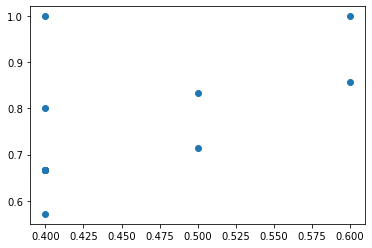

In [34]:
plt.scatter(x='support',y='confidence',data=rules_1)

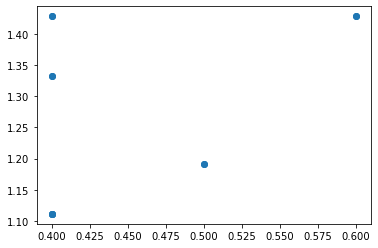

In [35]:
plt.scatter(x='support',y='lift',data=rules_1)

<AxesSubplot:xlabel='support'>

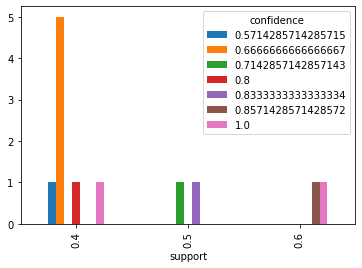

In [36]:
pd.crosstab(rules_1.support,rules_1.confidence).plot(kind="bar")

<AxesSubplot:ylabel='support'>

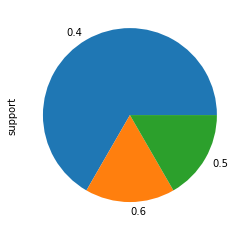

In [37]:
rules_1["support"].value_counts()
rules_1.support.value_counts().plot(kind="pie")

<AxesSubplot:ylabel='confidence'>

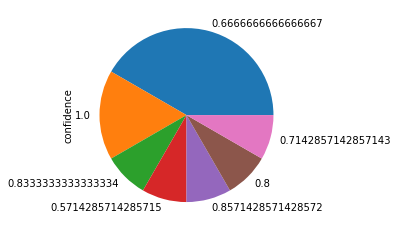

In [38]:
rules_1["confidence"].value_counts()
rules_1.confidence.value_counts().plot(kind="pie")

C:\Users\pabba\anaconda3\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\pabba\anaconda3\lib\site-packages\seaborn\distributions.py:1181: UserWarning: The following kwargs were not used by contour: 'X', 'Y'
  cset = contour_func(
C:\Users\pabba\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


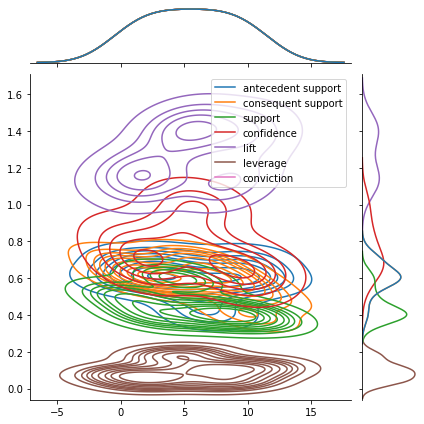

In [39]:
import seaborn as sns
sns.jointplot(X='support',Y='confidence',data=rules_1,kind='kde')
plt.show()

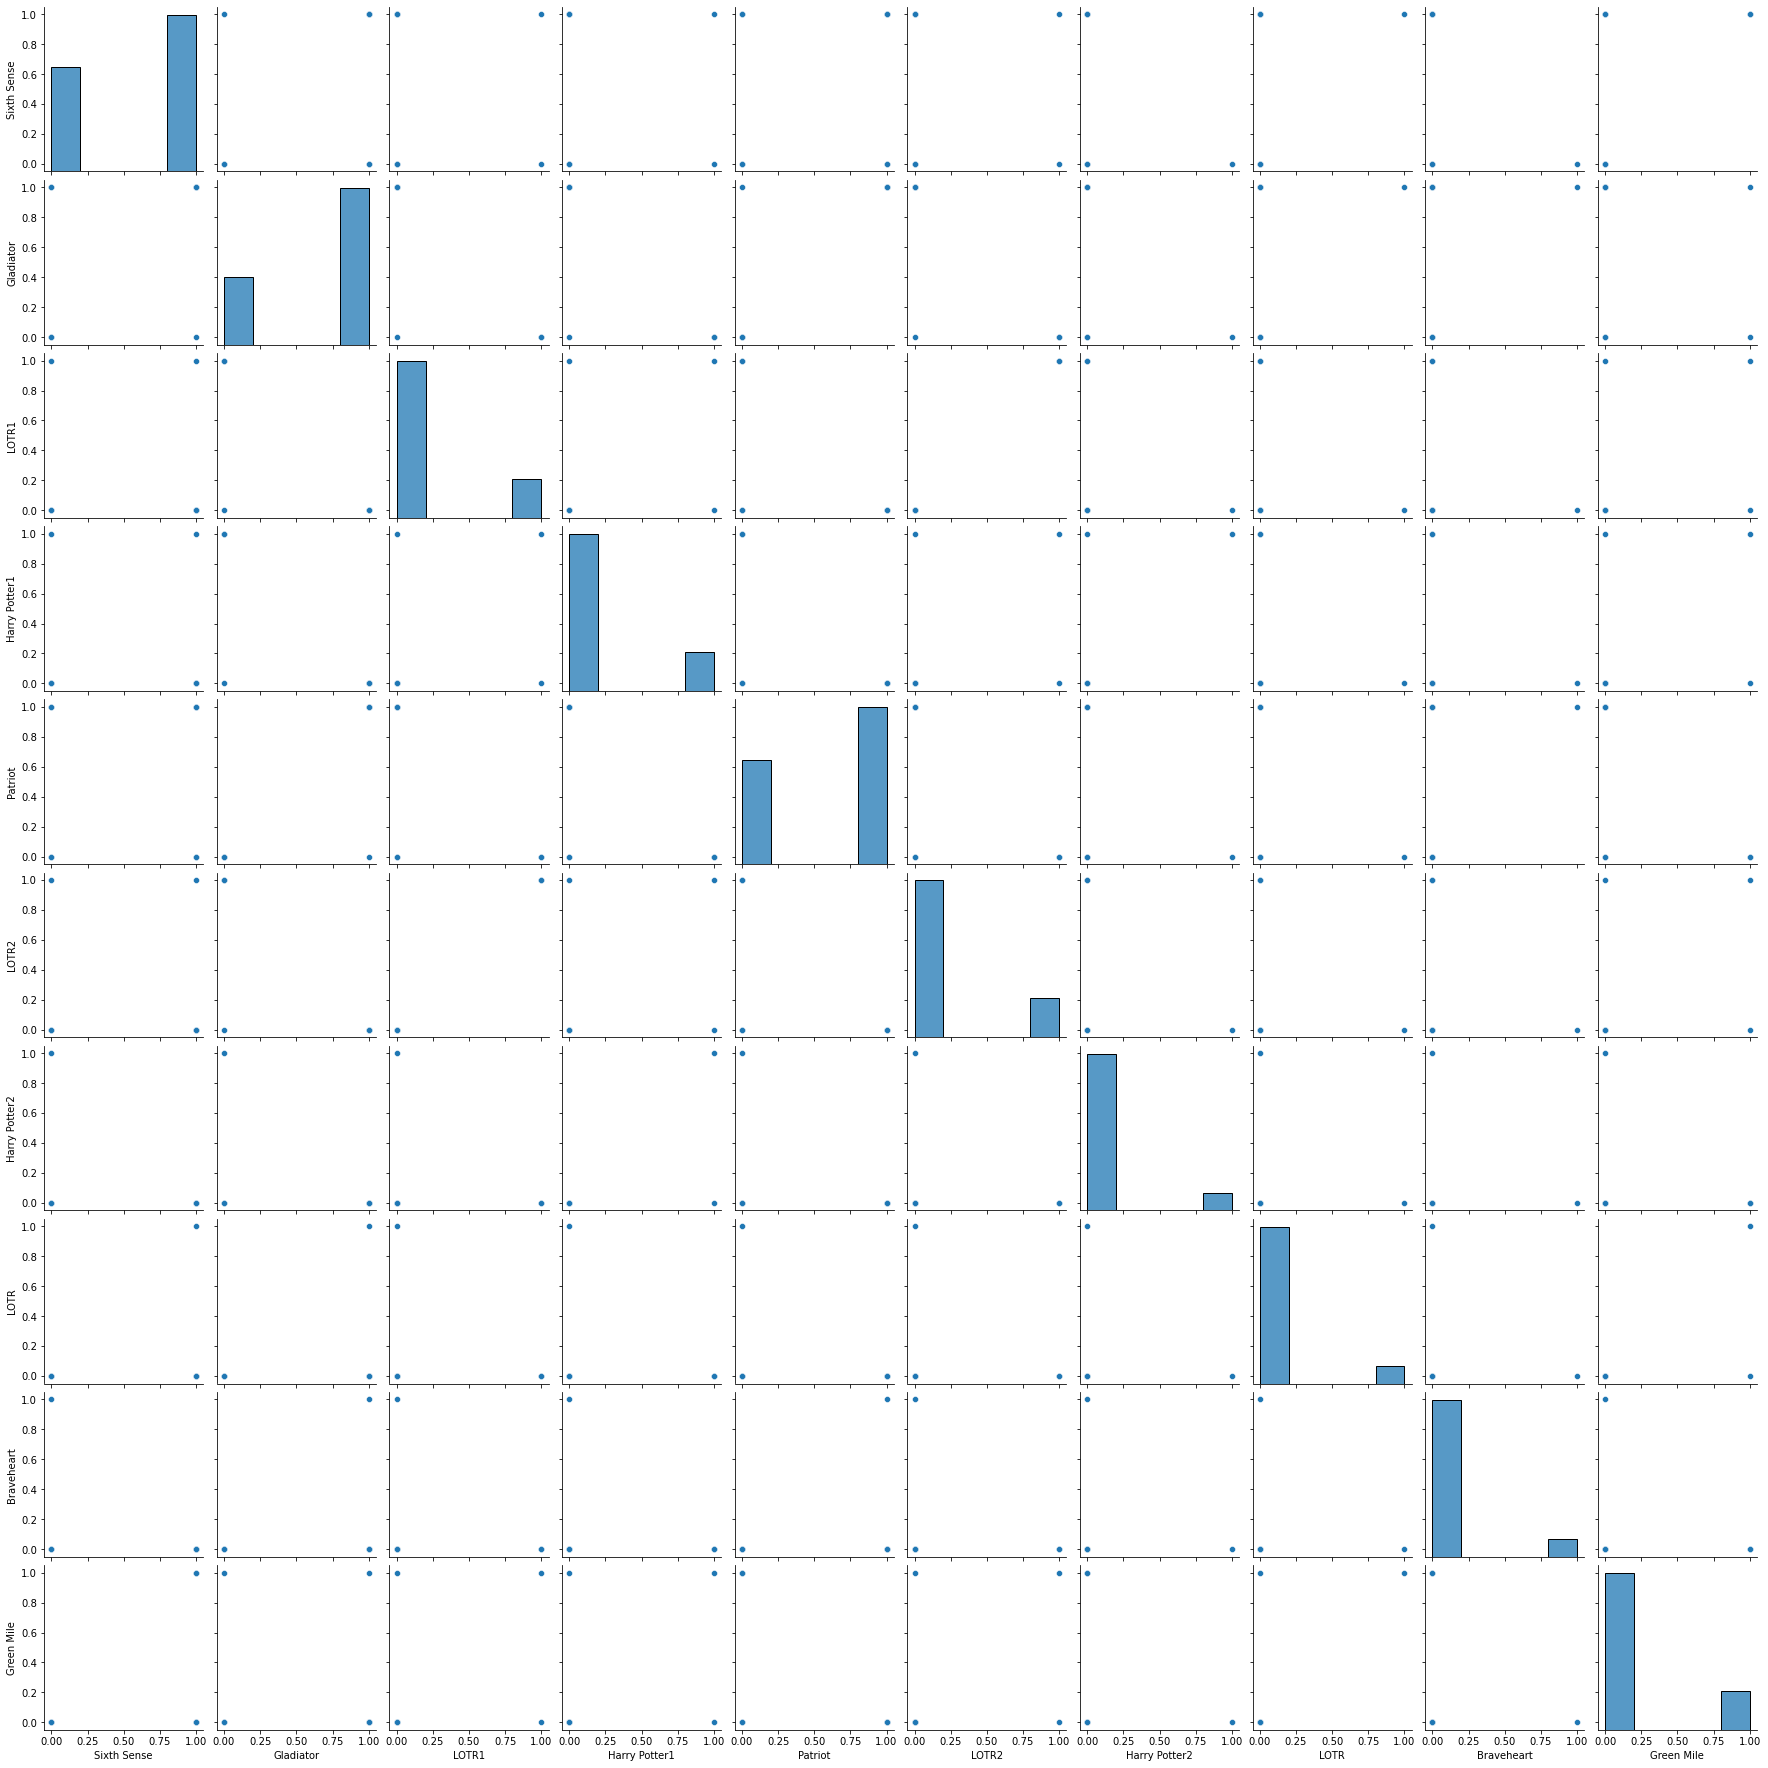

In [40]:
sns.pairplot(movies)
plt.show()

In [ ]:
sns.distplot(rules_1.lift)

### My_Movie dataset Apriori Algorithm is done min_support =0.1 is given and then association rules 'lift' type is done where min_threshold is 0.4 as taken and output is obtained for that. Than lift>1 values is been filtered form the output.